# IUE UV spectrum of HR Delphinus

Figure 12.7 from Chapter 12 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University
Press.

The far UV spectrum of HR Del, averaged over the interval 1979-1992 Data are from the IUE satellite long- 
and short-wavelength channels.  See Selvelli and Friedjung [2003, A&A, 401, 297](https://ui.adsabs.harvard.edu/abs/2003A%2526A...401..297) Figure 1, plotted using processed UV spectra of old novae published by Selvelli and Gilmozzi [2013, A&A, 560, 49](https://ui.adsabs.harvard.edu/abs/2013A%26A...560A..49S) and retrieved
from VizieR [J/A+A/560/A49](https://cdsarc.cds.unistra.fr/viz-bin/cat/J/A+A/560/A49) in FITS format.

In [8]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

# FITS file import

from astropy.io import fits

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [9]:
plotFile = 'Fig12_7.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

### FITS spectrum

FITS format spectrum is 1d fluxes with wavelength scaling in the CRPIX1, CRVAL1, and CDELT1 header values.  The data file is `HRDel_IUE.fits` found in the same directory as this notebook.

In [10]:
fitsFile = 'HRDel_IUE.fits'
hdu = fits.open(fitsFile)
hdr = hdu[0].header

# Scale fluxes by 1e-13

flux = hdu[0].data/1.0e-13

pix0 = hdr['CRPIX1']
lam0 = hdr['CRVAL1']
dlam = hdr['CDELT1']
numF = len(flux)

# range of wavelengths and fluxes

minLam = lam0 - pix0*dlam
maxLam = minLam + numF*dlam
lam = np.linspace(minLam,maxLam,numF)

minFlux = 1.0 # x10^-13 erg/cm^2/s/A
maxFlux = 9.0 

### Figure 12.7

Plot the spectrum as a line, 1.8:1 aspect ratio as a pixel (step) plot.  The axis ratio gives the right balance
of X and Y axes - our usual 2.5:1 is too long/thin for this particular plot.

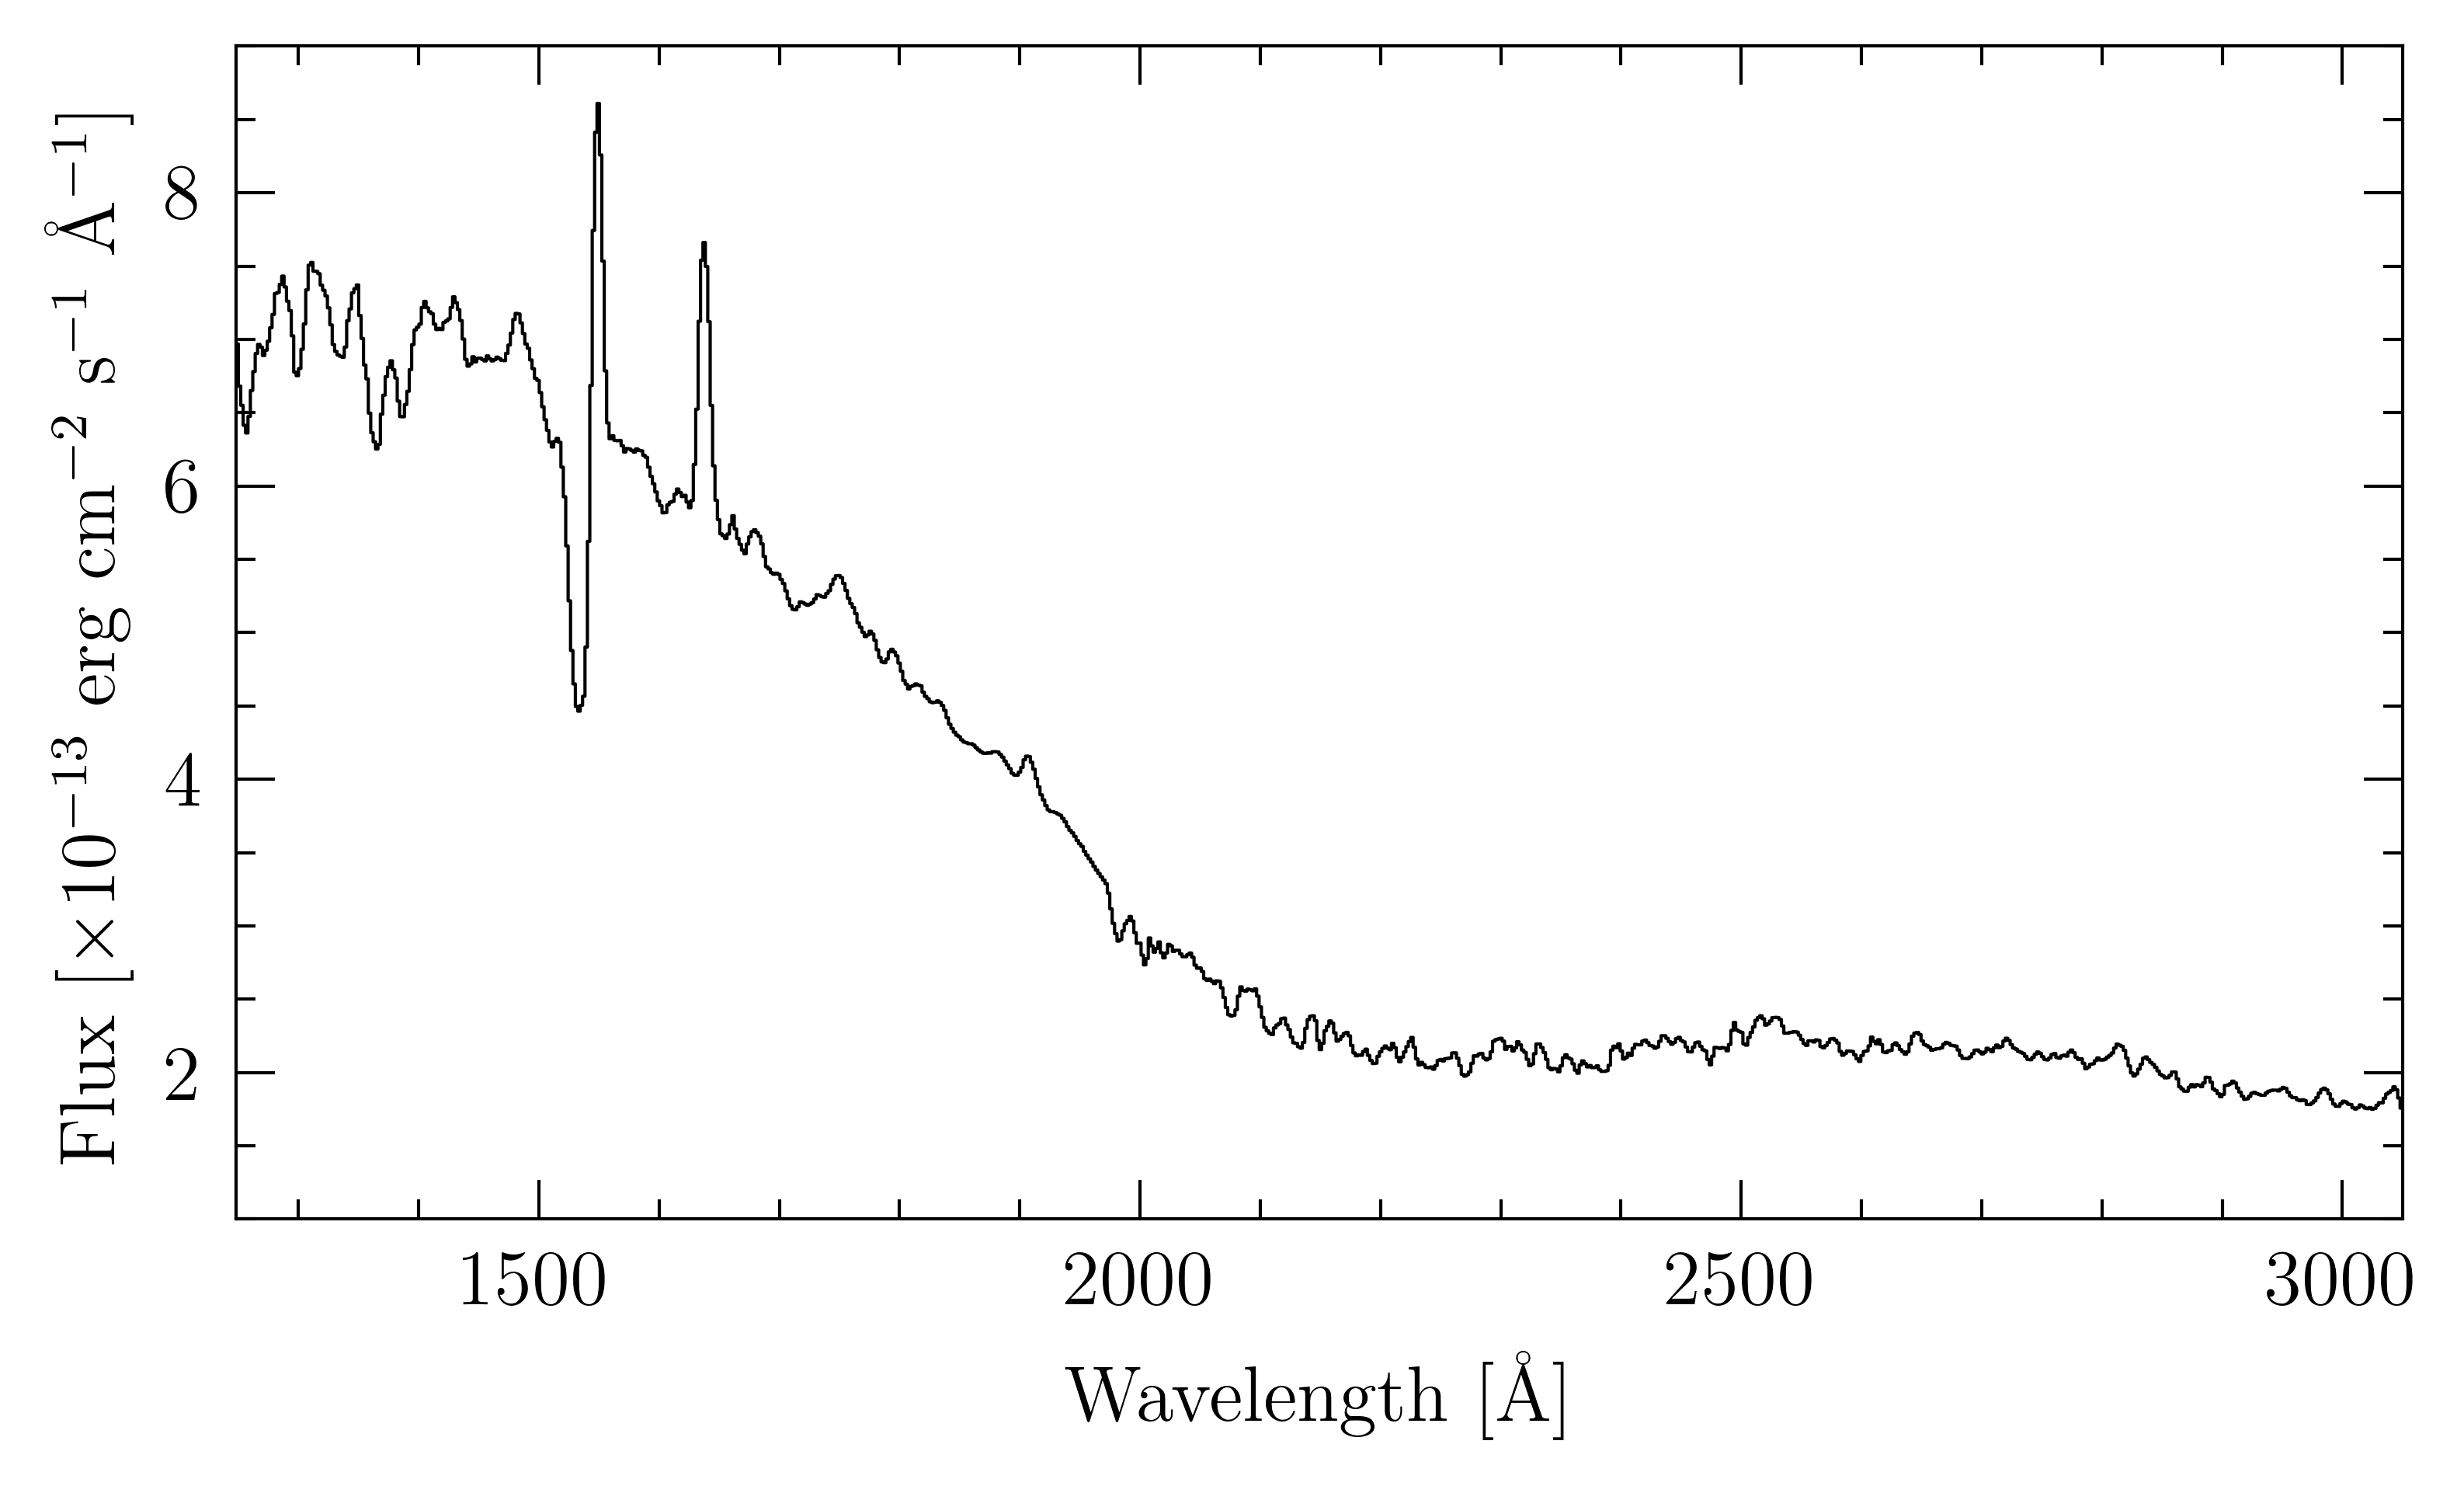

In [11]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minLam,maxLam)
ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.set_xlabel(r'Wavelength [\AA]',fontsize=axisFontSize)

ax.set_ylim(minFlux,maxFlux)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.set_ylabel(r'Flux [$\times 10^{-13}$ erg cm$^{-2}$ s$^{-1}$ \AA$^{-1}$]',fontsize=axisFontSize)

# make a step plot

ax.step(lam,flux,'-',lw=0.5,color='black',zorder=10)

# make the PNG file

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')